<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/cluster_Oximetry_Data_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/Oximetry_Data.csv'

In [4]:
df = pd.read_csv(FILE_LOCATION)
df
#df.head()

,no,obs,rep,CO,PULSE,Unnamed: 5,obs_new,CO_new,PULSE_new
0,1,1,1,0.5497,0.3889,NaN,1.0,0.5299,0.4104
1,2,1,2,0.5102,0.4102,NaN,2.0,0.3314,0.3208
2,3,1,3,0.5297,0.4320,NaN,3.0,0.6372,0.5694
3,4,2,1,0.3414,0.3274,NaN,4.0,0.2732,0.2500
4,5,2,2,0.3194,0.3076,NaN,5.0,0.4837,0.4127
...,...,...,...,...,...,...,...,...,...
172,173,60,2,0.7042,0.5248,NaN,NaN,NaN,NaN
173,174,60,3,0.7432,0.6021,NaN,NaN,NaN,NaN
174,175,61,1,0.4982,0.4102,NaN,NaN,NaN,NaN
175,176,61,2,0.5174,0.3680,NaN,NaN,NaN,NaN


In [5]:
table = df[['obs_new', 'CO_new', 'PULSE_new']]
table

,obs_new,CO_new,PULSE_new
0,1.0,0.5299,0.4104
1,2.0,0.3314,0.3208
2,3.0,0.6372,0.5694
3,4.0,0.2732,0.2500
4,5.0,0.4837,0.4127
...,...,...,...
172,NaN,NaN,NaN
173,NaN,NaN,NaN
174,NaN,NaN,NaN
175,NaN,NaN,NaN


In [6]:
# Define in which columns to look for missing values.
table1 = table.dropna(subset=['obs_new', 'CO_new', 'PULSE_new'])
table1

,obs_new,CO_new,PULSE_new
0,1.0,0.5299,0.4104
1,2.0,0.3314,0.3208
2,3.0,0.6372,0.5694
3,4.0,0.2732,0.2500
4,5.0,0.4837,0.4127
...,...,...,...
56,57.0,0.9380,0.8911
57,58.0,0.9494,0.8179
58,59.0,0.9647,1.0359
59,60.0,0.7602,0.5674


In [8]:
x = table1[['PULSE_new']]
y = table1['CO_new']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

table_data_new = pd.DataFrame({ 'x1'    : table1['PULSE_new'],
                                'y'     : table1['CO_new'],
                                'y_hat' : df['Predicted']})
table_data_new['e'] = table_data_new['y'] - table_data_new['y_hat']
table_data_new

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,x1,y,y_hat,e
0,0.4104,0.5299,0.476748,0.053152
1,0.3208,0.3314,0.385295,-0.053895
2,0.5694,0.6372,0.639035,-0.001835
3,0.2500,0.2732,0.313031,-0.039831
4,0.4127,0.4837,0.479095,0.004605
...,...,...,...,...
56,0.8911,0.9380,0.967387,-0.029387
57,0.8179,0.9494,0.892673,0.056727
58,1.0359,0.9647,1.115180,-0.150480
59,0.5674,0.7602,0.636994,0.123206


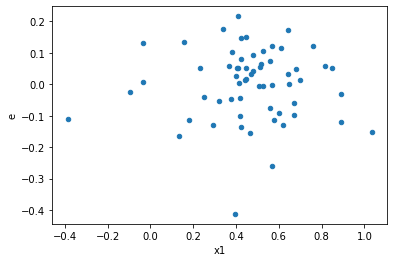

In [9]:
table_data_new.plot(x ='x1', y='e', kind = 'scatter')

In [11]:
# แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean
#Set number of clusters
x = table_data_new[['y_hat']]
k_means = KMeans(n_clusters=2)
#Run the clustering algorithm
model = k_means.fit(x)
#Generate cluster predictions and store in y_kmeans
#km.fit(x)
y_kmeans = k_means.predict(x)
y_kmeans

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
# kmean_clusters.astype(float)
kmean_clusters = pd.DataFrame({'clusters' : y_kmeans})
kmean_clusters.head()

,clusters
0,0
1,0
2,0
3,1
4,0


In [13]:
# เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
data_clusters = pd.concat([table_data_new, kmean_clusters], axis=1)
data_clusters

,x1,y,y_hat,e,clusters
0,0.4104,0.5299,0.476748,0.053152,0
1,0.3208,0.3314,0.385295,-0.053895,0
2,0.5694,0.6372,0.639035,-0.001835,0
3,0.2500,0.2732,0.313031,-0.039831,1
4,0.4127,0.4837,0.479095,0.004605,0
...,...,...,...,...,...
56,0.8911,0.9380,0.967387,-0.029387,0
57,0.8179,0.9494,0.892673,0.056727,0
58,1.0359,0.9647,1.115180,-0.150480,0
59,0.5674,0.7602,0.636994,0.123206,0


In [14]:
# กลุ่มที่ 1
data_cluster0 = data_clusters[data_clusters.clusters == 0]

y = data_cluster0[['y']]
x = data_cluster0[['x1']]
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()

DF1 = model1.df_resid + 1
SSE1 = model1.ssr
MSE1 = SSE1/DF1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
DF1

50.0

In [16]:
SSE1

0.6502330656967705

In [18]:
# กลุ่มที่ 2
data_cluster1 = data_clusters[data_clusters.clusters == 1]

y = data_cluster1[['y']]
x = data_cluster1[['x1']]
x = sm.add_constant(x)
model2 = sm.OLS(y, x).fit()

DF2 = model2.df_resid + 1
SSE2 = model2.ssr
MSE2 = SSE2/DF2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
DF2

9.0

In [20]:
SSE2

0.10229707016254956

In [21]:
# คำนวณค่าสถิติ
GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)
GQ_test_clusters

0.8740205419261736

In [22]:
# คำนวณค่า p-value
# pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, DF2, DF1)))
p_greater = ss.f.cdf(GQ_test_clusters, DF2, DF1)
p_less = 1.0-ss.f.cdf(GQ_test_clusters, DF2, DF1)

In [23]:
two_tailed

1.108454253632495

In [26]:
p_greater*2

0.8915457463675049

In [25]:
p_less

0.5542271268162475

###### The two-tailed p-value equals: 0.8915

###### p( x < 0.874 ) = 0.4458
###### p( x > 0.874 ) = 0.5542
###### p( x < 0.874 ) + p( x >1.0088) = 0.8915
###### Since p-value > α, H0 is not rejected. (0.8915 > 0.05)

https://www.statskingdom.com/p_value.html

In [28]:
Significance = 0.05
if p_greater*2 < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=1 : Homoscedasticity
